# Load Data - Ignorar

In [1]:
!git clone https://github.com/Sergio55Veliz/Sercop-DataScience.git

Cloning into 'Sercop-DataScience'...
remote: Enumerating objects: 280, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 280 (delta 25), reused 78 (delta 24), pack-reused 201
Receiving objects: 100% (280/280), 583.52 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (127/127), done.
Checking out files: 100% (119/119), done.


In [2]:
cd Sercop-DataScience

/content/Sercop-DataScience


In [3]:
!ls

 data			 Jorge.ipynb  'Preguntas 4-7.ipynb'   Sergio.ipynb
 extracting_dataset.py	 logs	       __pycache__	      utilities
 __init__.py		 main.py       README.md


In [4]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from extracting_dataset import *
from extracting_dataset import load_complete_data

In [6]:
#json_2019 = load_complete_data(2019, True)
#json_2020 = load_complete_data(2020, True)
#json_2021 = load_complete_data(2021, True)
#json_2022 = load_complete_data(2022, True)

In [7]:
import pandas as pd
import numpy as np

In [8]:
year = '2019'
#dataComplete_2019 = None
#dataComplete_2019 = pd.json_normalize(load_complete_data(year, True)['content'])
#dataComplete_2019.head()

In [9]:
#dataComplete_2019.shape

In [10]:
#for element in dataComplete_2019.columns: print(element)
#element = None

id

tag

date

ocid

awards

parties

language

contracts

initiationType

buyer.id
buyer.name

tender.id
tender.items
tender.title
tender.value.amount
tender.value.currency
tender.status
tender.tenderers
tender.awardPeriod.endDate
tender.awardPeriod.maxExtentDate
tender.description
tender.tenderPeriod.endDate
tender.tenderPeriod.startDate
tender.tenderPeriod.maxExtentDate
tender.tenderPeriod.durationInDays
tender.awardCriteria
tender.enquiryPeriod.startDate
tender.procuringEntity.id
tender.procuringEntity.name
tender.numberOfTenderers
tender.procurementMethod
tender.eligibilityCriteria
tender.mainProcurementCategory
tender.procurementMethodDetails

tender.competitive

tender.lots
tender.enquiries
tender.awardPeriod.startDate
tender.awardPeriod.durationInDays
tender.hasEnquiries
tender.enquiryPeriod.endDate
tender.enquiryPeriod.maxExtentDate
tender.enquiryPeriod.durationInDays

tender.awardCriteriaDetails

planning.budget.id
planning.budget.amount.amount
planning.budget.amount.currency
planning.rationale

relatedProcesses

auctions

bids.details
bids.statistics


In [11]:
#!git pull

# Preguntas 8 y 9

- ¿Cuál es la suma de el número de veces que las empresas ganaron las licitaciones según su sector de producción por año?

- ¿Cuál es la suma de el número de veces que las empresas NO ganaron las licitaciones según su sector de producción por año?

In [15]:
from __init__ import *
from extracting_dataset import *
from extracting_dataset import load_complete_data

## Data Generation

In [16]:
dataEmpresas = pd.read_csv("data/directorio_companias.csv", encoding = "cp1252").loc[:, ["NOMBRE", "RUC", "CIIU NIVEL 1"]]
dataEmpresas.columns = ["NOMBRE", "RUC", "CIIU"]
dataEmpresas = dataEmpresas.loc[~ dataEmpresas["CIIU"].isna()].reset_index(drop=True)
dataEmpresas.head()

,NOMBRE,RUC,CIIU
0,ACEITES TROPICALES SOCIEDAD ANONIMA ATSA,1.790014e+12,A
1,ACERIA DEL ECUADOR CA ADELCA.,1.790005e+12,C
2,ACERO COMERCIAL ECUATORIANO S.A.,1.790009e+12,G
3,AERO TAXIS ECUATORIANOS SA ATESA,1.790006e+12,H
4,AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA,1.790044e+12,H


In [17]:
dataEmpresas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178600 entries, 0 to 178599
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   NOMBRE  178600 non-null  object 
 1   RUC     171269 non-null  float64
 2   CIIU    178600 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.1+ MB


In [18]:
ciiu_names = {
    "A":"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCA",
    "B":"EXPLOTACIÓN DE MINAS Y CANTERAS",
    "C":"INDUSTRIAS MANUFACTURERAS",
    "D":"SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO",
    "E":"DISTRIBUCIÓN DE AGUA; ALCANTARILLADO, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO",
    "F":"CONSTRUCCIÓN",
    "G":"COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS",
    "H":"TRANSPORTE Y ALMACENAMIENTO",
    "I":"ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS",
    "J":"INFORMACIÓN Y COMUNICACIÓN",
    "K":"ACTIVIDADES FINANCIERAS Y DE SEGUROS",
    "L":"ACTIVIDADES INMOBILIARIAS",
    "M":"ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS",
    "N":"ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO",
    "O":"ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA",
    "P":"ENSEÑANZA",
    "Q":"ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL",
    "R":"ARTES, ENTRETENIMIENTO Y RECREACIÓN",
    "S":"OTRAS ACTIVIDADES DE SERVICIOS",
    "T":"ACTIVIDADES DE LOS HOGARES COMO EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO",
    "U":"ACTIVIDADES DE ORGANIZACIONES Y ÓRGANOS EXTRATERRITORIALES",
    "otros":"otros"
}

In [19]:
def dict_loses_wins_adjudications(dataComplete, df_empresas):
    from extracting_dataset import progress_bar

    dic_p2 = dict()

    total_registers = dataComplete.loc[(dataComplete["tender.status"]=="complete") & (dataComplete["awards"].notnull()) & (dataComplete["tender.numberOfTenderers"]>1)].reset_index(drop=True).shape[0]
    for index, row in dataComplete.loc[(dataComplete["tender.status"]=="complete") 
                                        & (dataComplete["awards"].notnull()) 
                                        & (dataComplete["tender.numberOfTenderers"]>1)
                                        ].reset_index(drop=True).iterrows(): 
        progress_bar(actual_value = index+1,
                    max_value = total_registers,
                    initial_message = "Progress:"
                    )
        
        list_winners = []
        for awarded in row["awards"]:
            list_winners += awarded["suppliers"].copy()

        ciius_per_ocid = {}
        for supplier_data in row["tender.tenderers"]:
            ruc = supplier_data["id"]
            name = supplier_data["name"]
            ciiu = df_empresas.loc[ruc, "CIIU"]
            ciiu_name = ciiu_names[ciiu]

            win  = int(supplier_data in list_winners)
            lose = int(supplier_data not in list_winners)

            if name in dic_p2:
                dic_p2[name]["awardeds"] += win
                dic_p2[name]["loses"] += lose
                dic_p2[name]["total_contracts"] += 1
            else:
                dic_p2[name] = {"RUC": ruc,
                                "CIIU": ciiu,
                                "CIIU_name": ciiu_name,
                                "awardeds": win,
                                "loses": lose,
                                "total_contracts": 1
                                }

    return dic_p2

In [37]:
def data_p_generator(year):
    print("Preparing... ")

    # extraer data complete
    dataComplete = pd.json_normalize(load_complete_data(year, True)['content'])

    df_empresas = pd.DataFrame(list(dataComplete[(dataComplete["tender.status"]=="complete") 
                                                 & (dataComplete["awards"].notnull()) 
                                                 & (dataComplete["tender.numberOfTenderers"]>1)
                                                 ].reset_index(drop=True
                                                               ).explode("tender.tenderers"
                                                               ).reset_index(drop=True)["tender.tenderers"]))
    df_empresas.drop_duplicates(subset=['id'], inplace=True)
    df_empresas.reset_index(drop=True, inplace=True)
    df_empresas["RUC"] = pd.DataFrame(df_empresas["id"].str.split("-").tolist()).iloc[:,2].astype("int64")

    #Merge
    df_empresas = df_empresas.merge(dataEmpresas, on="RUC", how="left")

    # Código ruc completo como index
    df_empresas.set_index("id", inplace=True)

    # Manejando los valores nan en CIIU
    df_empresas.loc[df_empresas.loc[:, "CIIU"].isna(), "CIIU"] = "otros"
    # Verificamos que ya no hayan nan
    print(df_empresas.loc[:,"CIIU"].isna().sum())

    # Genera diccionario con #adjudicaciones ganadas, perdidas y total de contratos participados por empresa
    return dict_loses_wins_adjudications(dataComplete, df_empresas)


In [21]:
def group_by_CIIU(dic_p2):
    # Agurpamos adjudicaciones ganadas y perdidas por CIIU
    return pd.DataFrame(dic_p2).transpose().groupby("CIIU").sum().reset_index().loc[:,["CIIU", "CIIU_name", "awardeds", "loses"]]

In [22]:
url_proyect

'/content/Sercop-DataScience'

In [23]:
dir_p89_dataGenerated = url_proyect + "/data/output/Pregunta 8 y 9/"

In [24]:
# Generar Data
from utilities.utilities import verify_create_folder
verify_create_folder(dir_p89_dataGenerated)

for year in ["2019", "2020", "2021", "2022"]:
    print("\n\n\n", year, "\n")
    name_file = "p8y9_"+year+".csv"
    group_by_CIIU(data_p_generator(year)
                  ).to_csv(dir_p89_dataGenerated + name_file, index=False)

	La carpeta '/content/Sercop-DataScience/data/output/Pregunta 8 y 9/' ha sido creada EXITOSAMENTE



 2019 

Preparing... 

	Extracted files successfully!! from:  /content/Sercop-DataScience/data/complete/2019/dataComplete2019_2.zip

	Extracted files successfully!! from:  /content/Sercop-DataScience/data/complete/2019/dataComplete2019_1.zip
dataComplete2019_batch17.json
dataComplete2019_batch09.json
dataComplete2019_batch18.json
dataComplete2019_batch08.json
dataComplete2019_batch12.json
dataComplete2019_batch06.json
dataComplete2019_batch11.json
dataComplete2019_batch15.json
dataComplete2019_batch05.json
dataComplete2019_batch02.json
dataComplete2019_batch13.json
dataComplete2019_batch01.json
dataComplete2019_batch10.json
dataComplete2019_batch07.json
dataComplete2019_batch03.json
dataComplete2019_batch04.json
dataComplete2019_batch14.json
dataComplete2019_batch16.json
0
Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]  13017/13017 



 2020 

Preparing... 

	Extracted f

## Visualization

In [27]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [28]:
p89_2019=pd.read_csv(dir_p89_dataGenerated+"p8y9_2019.csv")
p89_2020=pd.read_csv(dir_p89_dataGenerated+"p8y9_2020.csv")
p89_2021=pd.read_csv(dir_p89_dataGenerated+"p8y9_2021.csv")
p89_2022=pd.read_csv(dir_p89_dataGenerated+"p8y9_2022.csv")

p89_2019["year"]="2019"
p89_2020["year"]="2020"
p89_2021["year"]="2021"
p89_2022["year"]="2022"

In [29]:
p89_data = pd.concat([p89_2019, p89_2020, p89_2021, p89_2022])
p89_data.head()

,CIIU,CIIU_name,awardeds,loses,year
0,A,"AGRICULTURA, GANADERÍA, SILVICULTURA Y PESCAAG...",22,54,2019
1,B,EXPLOTACIÓN DE MINAS Y CANTERASEXPLOTACIÓN DE ...,14,60,2019
2,C,INDUSTRIAS MANUFACTURERASINDUSTRIAS MANUFACTUR...,734,1720,2019
3,D,"SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ...",30,106,2019
4,E,"DISTRIBUCIÓN DE AGUA; ALCANTARILLADO, GESTIÓN ...",38,74,2019


### Respuesta a **Pregunta 8**

In [30]:
ciiu_wins_per_year = pd.pivot_table(data = p89_data, 
                                    aggfunc = np.sum,      # La suma de los      awardeds
                                    values = 'awardeds',   # valor de las celdas   ↩
                                    index = 'CIIU',        # Por tipo de sector productivo
                                    columns = 'year'       # y por año
                                    )
ciiu_wins_per_year

year,2019,2020,2021,2022
CIIU,,,,
A,22.0,14.0,22.0,6.0
B,14.0,17.0,10.0,1.0
C,734.0,657.0,663.0,93.0
D,30.0,36.0,9.0,8.0
E,38.0,73.0,79.0,13.0
F,692.0,505.0,472.0,129.0
G,3061.0,2197.0,2133.0,299.0
H,155.0,150.0,116.0,17.0
I,10.0,0.0,4.0,1.0


Text(0.5, 1.0, 'Cantidad de empresas que ganaron las licitaciones \npor año y código CIIU\n')

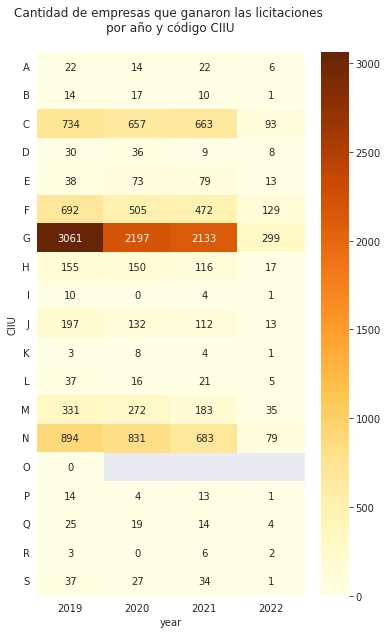

In [31]:
sbn.set_style('darkgrid')
fig, axs = plt.subplots(figsize=(6, 10))
foo = sbn.heatmap(ciiu_wins_per_year.iloc[:-1], # Pivot Table, verificar orden, eso importa para asignar los labels
                  ax=axs, 
                  cmap='YlOrBr',           # formato de colores -> otros más: https://seaborn.pydata.org/tutorial/color_palettes.html
                  annot=True,              # mostrar los valores
                  fmt='.0f'                # con 0 decimales
                  )
plt.yticks(rotation=0) 
axs.set_title("Cantidad de empresas que ganaron las licitaciones \npor año y código CIIU\n")

### Respuesta a **Pregunta 9**

In [32]:
ciiu_loses_per_year = pd.pivot_table(data = p89_data, 
                                     aggfunc = np.sum,      # La suma de los       loses
                                     values = 'loses',      # valor de las celdas   ↩
                                     index = 'CIIU',        # Por tipo de sector productivo
                                     columns = 'year'       # y por año
                                     )
ciiu_loses_per_year

year,2019,2020,2021,2022
CIIU,,,,
A,54.0,51.0,53.0,10.0
B,60.0,51.0,44.0,4.0
C,1720.0,1608.0,1633.0,189.0
D,106.0,117.0,64.0,10.0
E,74.0,135.0,126.0,17.0
F,4189.0,4682.0,4700.0,779.0
G,9393.0,6667.0,6370.0,965.0
H,422.0,546.0,454.0,33.0
I,18.0,6.0,5.0,0.0


Text(0.5, 1.0, 'Cantidad de empresas que perdieron las licitaciones \npor año y código CIIU\n')

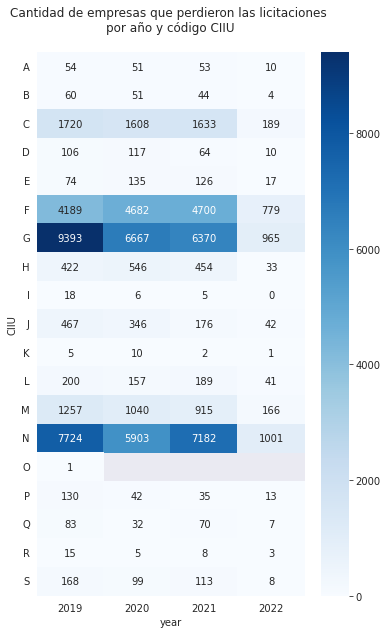

In [33]:
sbn.set_style('darkgrid')
fig, axs = plt.subplots(figsize=(6, 10))
foo = sbn.heatmap(ciiu_loses_per_year.iloc[:-1], # Pivot Table, verificar orden, eso importa para asignar los labels
                  ax=axs, 
                  cmap='Blues',            # formato de colores -> otros más: https://seaborn.pydata.org/tutorial/color_palettes.html
                  annot=True,              # mostrar los valores
                  fmt='.0f'                # con 0 decimales
                  )
plt.yticks(rotation=0) 
axs.set_title("Cantidad de empresas que perdieron las licitaciones \npor año y código CIIU\n")

# Pregunta 10

Tops 10 de las empresas más contratadas y rechazadas en el **sector G** y los criterios de selección relacionados a ellas (tender.awardCriteria)

Con esto se busca responder a:
 - ¿Qué tanto afectó a las empresas que más contrataciones tenían en el 2019 la pandemia?

## Verificamos los awardCriteria para cada año

In [ ]:
awardCriterias_per_year = dict()
for year in ["2019", "2020", "2021", "2022"]:
    print(year)
    for elem in pd.json_normalize(load_complete_data(year, True)['content']).loc[:,"tender.awardCriteria"].unique(): 
        if year not in awardCriterias_per_year:
            awardCriterias_per_year[year] = [elem]
        else:
            awardCriterias_per_year[year] += [elem]

In [14]:
for year, criterias in awardCriterias_per_year.items():
    print("awardCriteria del año", year, "-->", criterias, end="\n\n")

# Como vemos son solo de ratedCriteria

awardCriteria del año 2019 --> [nan, 'ratedCriteria']

awardCriteria del año 2020 --> ['ratedCriteria', nan]

awardCriteria del año 2021 --> [nan, 'ratedCriteria']

awardCriteria del año 2022 --> [nan, 'ratedCriteria']



## Data Generation

In [34]:
url_proyect

'/content/Sercop-DataScience'

In [35]:
dir_p10_dataGenerated = url_proyect + "/data/output/Pregunta 10/"

In [46]:
# Generar Data
from utilities.utilities import verify_create_folder
verify_create_folder(dir_p10_dataGenerated)

for year in ["2019", "2020", "2021", "2022"]:
    print("\n\n\n", year, "\n")
    name_file = "p10_"+year+".csv"
    pd.DataFrame(data_p_generator(year)).transpose().reset_index().to_csv(dir_p10_dataGenerated + name_file, index=False)

	La carpeta '/content/Sercop-DataScience/data/output/Pregunta 10/' ya ha sido creada



 2019 

Preparing... 

	Extracted files successfully!! from:  /content/Sercop-DataScience/data/complete/2019/dataComplete2019_2.zip

	Extracted files successfully!! from:  /content/Sercop-DataScience/data/complete/2019/dataComplete2019_1.zip
dataComplete2019_batch17.json
dataComplete2019_batch09.json
dataComplete2019_batch18.json
dataComplete2019_batch08.json
dataComplete2019_batch12.json
dataComplete2019_batch06.json
dataComplete2019_batch11.json
dataComplete2019_batch15.json
dataComplete2019_batch05.json
dataComplete2019_batch02.json
dataComplete2019_batch13.json
dataComplete2019_batch01.json
dataComplete2019_batch10.json
dataComplete2019_batch07.json
dataComplete2019_batch03.json
dataComplete2019_batch04.json
dataComplete2019_batch14.json
dataComplete2019_batch16.json
0
Progress: [■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■]  13017/13017 



 2020 

Preparing... 

	Extracted files successf

## Visualizations

In [47]:
import seaborn as sbn
import matplotlib.pyplot as plt

In [64]:
p10_2019=pd.read_csv(dir_p10_dataGenerated+"p10_2019.csv")
p10_2020=pd.read_csv(dir_p10_dataGenerated+"p10_2020.csv")
p10_2021=pd.read_csv(dir_p10_dataGenerated+"p10_2021.csv")
p10_2022=pd.read_csv(dir_p10_dataGenerated+"p10_2022.csv")

p10_2019["year"]="2019"
p10_2020["year"]="2020"
p10_2021["year"]="2021"
p10_2022["year"]="2022"

In [74]:
p10_data = pd.concat([p10_2019, p10_2020, p10_2021, p10_2022]).loc[p10_data["awardeds"].notna() & p10_data["loses"].notna()]
p10_data.head()

,index,RUC,CIIU,CIIU_name,awardeds,loses,total_contracts,year
0,GADERE S.A.,EC-RUC-0992294272001-42582,E,"DISTRIBUCIÓN DE AGUA; ALCANTARILLADO, GESTIÓN ...",10,4,14,2019
1,G&M TRATAMIENTO INTEGRAL DE DESECHOS G&MCOM CI...,EC-RUC-1792776023001-966187,E,"DISTRIBUCIÓN DE AGUA; ALCANTARILLADO, GESTIÓN ...",1,0,1,2019
2,CHANG AURIA VICTOR GUIDO,EC-RUC-0906466263001-63147,otros,otros,1,2,3,2019
3,HOLDAGUAS S.A.,EC-RUC-0992510404001-229613,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,3,0,3,2019
4,UESDEP S.A.,EC-RUC-0992868775001-559510,F,CONSTRUCCIÓN,0,5,5,2019


In [73]:
p10_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45620 entries, 0 to 4898
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            45616 non-null  object
 1   RUC              45620 non-null  object
 2   CIIU             45620 non-null  object
 3   CIIU_name        45620 non-null  object
 4   awardeds         45620 non-null  int64 
 5   loses            45620 non-null  int64 
 6   total_contracts  45620 non-null  int64 
 7   year             45620 non-null  object
dtypes: int64(3), object(5)
memory usage: 3.1+ MB


In [75]:
companies_wins = p10_2019.sort_values(by="awardeds", ascending=False).reset_index(drop=True).loc[:10,"index"].tolist()
companies_wins

['ASEGURADORA DEL SUR C. A.',
 'PRODUCTOS Y DISTRIBUCIONES MEDICAS ANDINO PRODIMEDA CIA. LTDA.',
 'MEDILABOR S.A.',
 'AKROS CIA. LTDA.',
 'B.BRAUN MEDICAL S.A.',
 'SIMED S. A.',
 'LABORATORIO VIDA (LABOVIDA) S.A.',
 'MUÑOZ BRAVO FREDDY ARTURO',
 'SEGUROS ALIANZA S A',
 'SWEADEN COMPAÑIA DE SEGUROS S.A.',
 'MAXIMAMEDICAL CIA. LTDA.']

In [76]:
companies_loses = p10_2019.sort_values(by="loses", ascending=False).reset_index(drop=True).loc[:10,"index"].tolist()
companies_loses

['VELEZ SUAREZ MARIA MONSERRATE',
 'DISTRIBUIDORA MEINJOR IMPORT MEDIK CIA.LTDA.',
 'SOLIS GUEVARA SILVIA JEANNETTE',
 'SANCHEZ & VITERI SEGURIDAD CIA. LTDA.',
 'MORALES VARAS NELSON GUILLERMO',
 'SEGUROS SUCRE S.A.',
 'REPRESENTACIONES MOLINA HERRERA M.H. CIA. LTDA.',
 'GONZALEZ & GONZALEZ SEGURIDAD PRIVADA SEGONPRIV CIA.LTDA.',
 'ALTA SEGURIDAD PRIVADA ALPRISEG CIA LTDA',
 'COMSUPPLIES S.A',
 'SEGURIDAD PRIVADA DE CALIDAD SEGPRIC CIA. LTDA.']

In [ ]:
#.sort_values(by="awardeds", ascending=False).reset_index(drop=True).loc[:10,["index", "awardeds"]]
#.sort_values(by="loses", ascending=False).reset_index(drop=True).loc[:10,["index", "loses"]]

In [86]:
wins_per_year = pd.pivot_table(data = p10_data, 
                                aggfunc = np.sum,      # La suma de los       loses
                                values = 'awardeds',      # valor de las celdas   ↩
                                index = 'index',        # Por tipo de sector productivo
                                columns = 'year'       # y por año
                                )
wins_per_year = wins_per_year.loc[wins_per_year["2019"].notna()].loc[companies_wins]
wins_per_year

year,2019,2020,2021,2022
index,,,,
ASEGURADORA DEL SUR C. A.,87.0,97.0,93.0,17.0
PRODUCTOS Y DISTRIBUCIONES MEDICAS ANDINO PRODIMEDA CIA. LTDA.,61.0,39.0,50.0,1.0
MEDILABOR S.A.,53.0,32.0,28.0,2.0
AKROS CIA. LTDA.,53.0,9.0,11.0,NaN
B.BRAUN MEDICAL S.A.,52.0,33.0,61.0,4.0
SIMED S. A.,51.0,30.0,29.0,7.0
LABORATORIO VIDA (LABOVIDA) S.A.,51.0,84.0,133.0,12.0
MUÑOZ BRAVO FREDDY ARTURO,49.0,39.0,47.0,1.0
SEGUROS ALIANZA S A,46.0,53.0,53.0,15.0


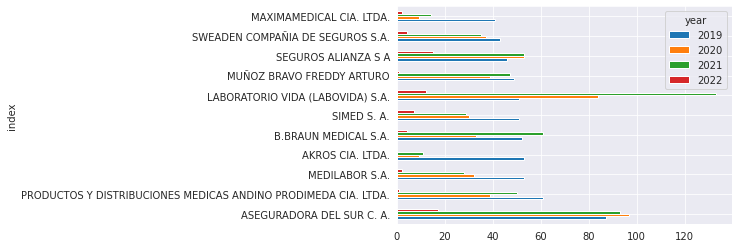

In [87]:
wins_per_year.plot.barh()

In [88]:
loses_per_year = pd.pivot_table(data = p10_data, 
                                aggfunc = np.sum,      # La suma de los       loses
                                values = 'loses',      # valor de las celdas   ↩
                                index = 'index',        # Por tipo de sector productivo
                                columns = 'year'       # y por año
                                )
loses_per_year = loses_per_year.loc[loses_per_year["2019"].notna()].loc[companies_loses]
loses_per_year

year,2019,2020,2021,2022
index,,,,
VELEZ SUAREZ MARIA MONSERRATE,324.0,164.0,34.0,NaN
DISTRIBUIDORA MEINJOR IMPORT MEDIK CIA.LTDA.,244.0,143.0,128.0,2.0
SOLIS GUEVARA SILVIA JEANNETTE,234.0,168.0,109.0,21.0
SANCHEZ & VITERI SEGURIDAD CIA. LTDA.,229.0,118.0,150.0,15.0
MORALES VARAS NELSON GUILLERMO,200.0,61.0,104.0,11.0
SEGUROS SUCRE S.A.,197.0,216.0,58.0,NaN
REPRESENTACIONES MOLINA HERRERA M.H. CIA. LTDA.,188.0,113.0,159.0,23.0
GONZALEZ & GONZALEZ SEGURIDAD PRIVADA SEGONPRIV CIA.LTDA.,183.0,264.0,157.0,21.0
ALTA SEGURIDAD PRIVADA ALPRISEG CIA LTDA,180.0,96.0,96.0,9.0


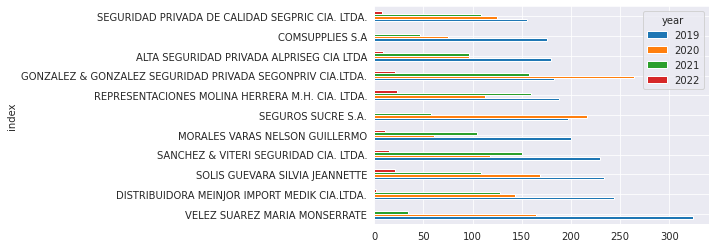

In [89]:
loses_per_year.plot.barh()